In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pydub import AudioSegment
from tqdm import tqdm

In [25]:
train_df = pd.read_csv('data/train_split.csv')
val_df = pd.read_csv('data/valid_split.csv')
train_df = train_df.drop(['Filename'], axis=1)
val_df = val_df.drop(['Filename'], axis=1)
sns.set_theme()

train_df.head()

,Admiration,Amusement,Determination,Empathic Pain,Excitement,Joy
0,0.333333,0.333333,0.0,0.0,0.333333,0.0
1,0.000000,0.000000,0.0,0.0,0.500000,0.0
2,0.500000,0.000000,0.0,0.0,0.000000,0.0
3,0.000000,0.000000,0.5,0.0,0.000000,0.0
4,0.400000,0.000000,0.0,0.0,0.200000,0.4


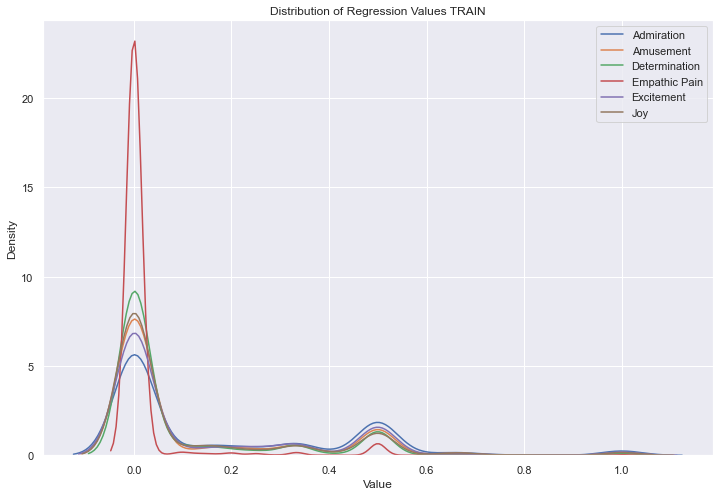

In [26]:
plt.figure(figsize=(12, 8))
for label in train_df.columns:
    if label != 'Filename':
        sns.kdeplot(train_df[label], label=label)

plt.title('Distribution of Regression Values TRAIN')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

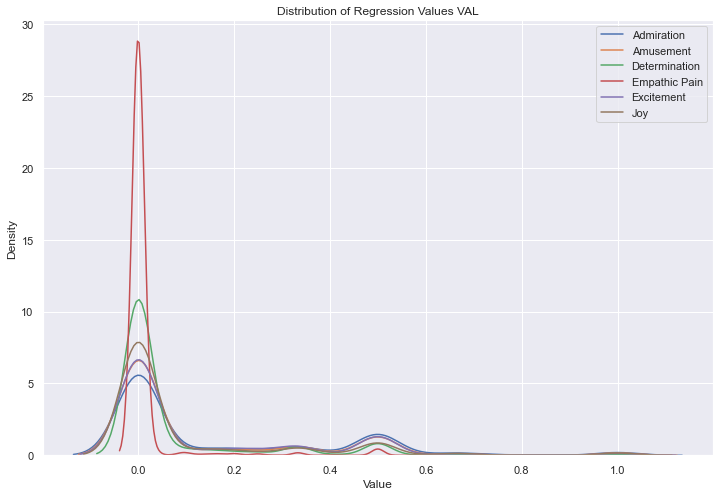

In [27]:
plt.figure(figsize=(12, 8))
for label in val_df.columns:
    if label != 'Filename':
        sns.kdeplot(val_df[label], label=label)

plt.title('Distribution of Regression Values VAL')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

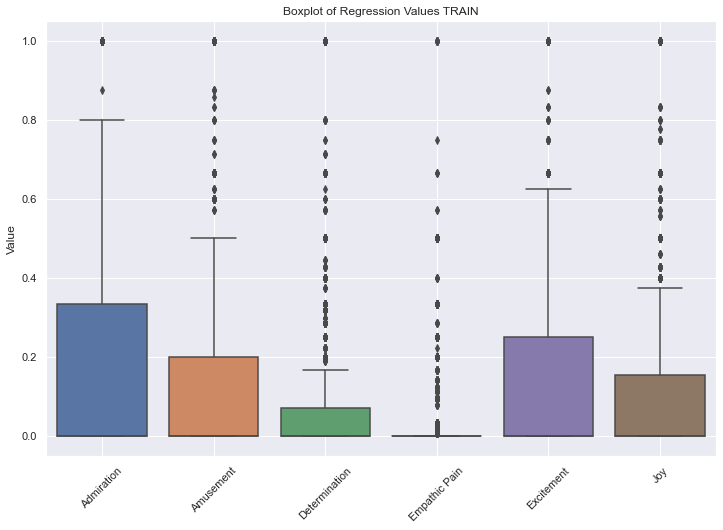

In [28]:
# Plotting the boxplots for the same dataframe to show the distribution of values
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_df)
plt.title('Boxplot of Regression Values TRAIN')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid for better readability
plt.show()

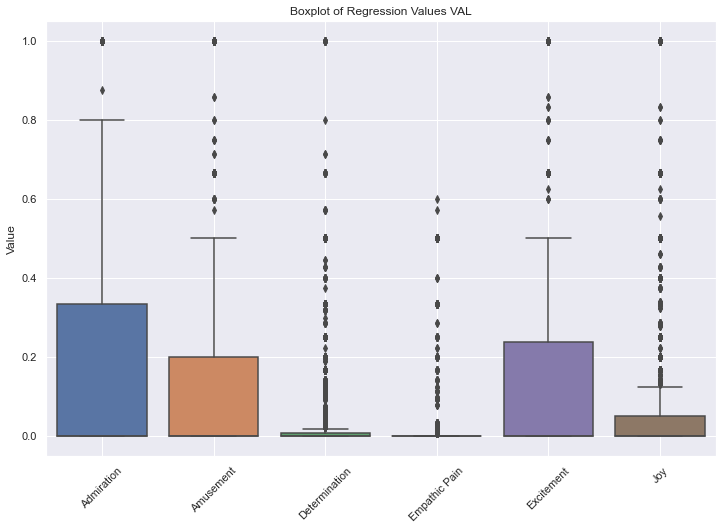

In [29]:
# Plotting the boxplots for the same dataframe to show the distribution of values
plt.figure(figsize=(12, 8))
sns.boxplot(data=val_df)
plt.title('Boxplot of Regression Values VAL')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid for better readability
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12660/12660 [37:34<00:00,  5.61it/s]


95th Percentile Duration: 11.47 seconds
Average Duration: 6.940145339652448 seconds
Maximum Duration: 1249.94 seconds
Minimum Duration: 0.1 seconds


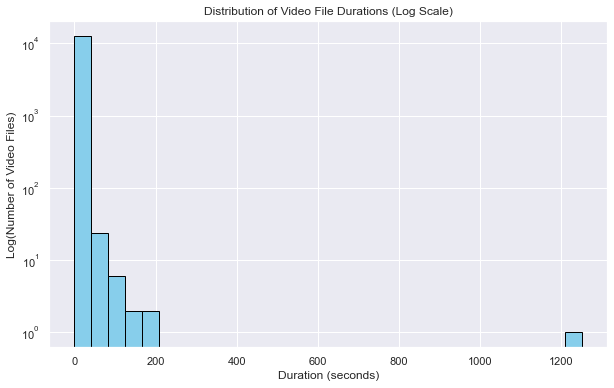

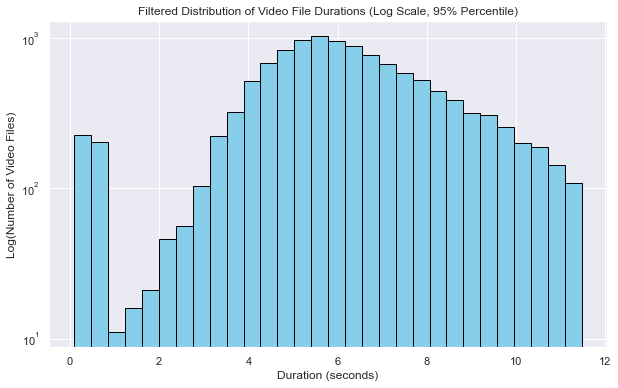

In [44]:
import os
from moviepy.editor import VideoFileClip

# Set the path to your folder containing the video files
folder_path = 'data/raw'  # Update this to the actual path

# List to store the duration of each video
durations = []

# Loop through all the files in the folder
for file in tqdm(os.listdir(folder_path)):
    if file.endswith(('.mp4', '.avi', '.mov', '.mkv')):  # Add or remove file extensions as needed
        try:
            # Load the video file
            video_path = os.path.join(folder_path, file)
            video = VideoFileClip(video_path)
            
            # Append the duration of the video to the list
            durations.append(video.duration)
            
            # Close the video file to free up resources
            video.close()
        except Exception as e:
            print(f"Error processing {file}: {e}")

# Calculate average, max, and min durations
if durations:
    percentile_95 = np.percentile(durations, 95)
    average_duration = np.mean(durations)
    max_duration = np.max(durations)
    min_duration = np.min(durations)

    print(f"95th Percentile Duration: {percentile_95} seconds")
    print(f"Average Duration: {average_duration} seconds")
    print(f"Maximum Duration: {max_duration} seconds")
    print(f"Minimum Duration: {min_duration} seconds")
else:
    print("No video files found or all files failed to process.")

if durations:
    # Plotting the durations with a log scale on the y-axis
    plt.figure(figsize=(10, 6))
    plt.hist(durations, bins=30, color='skyblue', edgecolor='black', log=True)
    plt.title('Distribution of Video File Durations (Log Scale)')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Log(Number of Video Files)')
    plt.show()
else:
    print("No durations available for plotting.")
    
# Check if durations list is not empty
if durations:
    # Calculate the 95th percentile to use as a threshold for filtering out outliers
    percentile_95 = np.percentile(durations, 95)

    # Filter durations to remove outliers beyond the 95th percentile
    filtered_durations = [duration for duration in durations if duration <= percentile_95]

    # Replotting the filtered durations
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_durations, bins=30, color='skyblue', edgecolor='black', log=True)
    plt.title('Filtered Distribution of Video File Durations (Log Scale, 95% Percentile)')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Log(Number of Video Files)')
    plt.show()
else:
    print("No durations available for plotting.")

In [34]:

# Set the path to your folder containing the MP3 files
folder_path = 'data/audio'  # Update this to the actual path

# List to store the duration of each MP3 file
durations = []

# Loop through all the files in the folder
for file in tqdm(os.listdir(folder_path)):
    if file.endswith('.mp3'):  # Check for MP3 files
        try:
            # Load the MP3 file
            audio_path = os.path.join(folder_path, file)
            audio = AudioSegment.from_mp3(audio_path)
            
            # Append the duration of the audio to the list (duration in milliseconds)
            durations.append(len(audio))
            
            # No need to explicitly close the file with pydub
        except Exception as e:
            print(f"Error processing {file}: {e}")

# Convert durations from milliseconds to seconds
durations = [duration / 1000.0 for duration in durations]

# Calculate average, max, and min durations
if durations:
    percentile_95 = np.percentile(durations, 95)
    average_duration = np.mean(durations)
    max_duration = np.max(durations)
    min_duration = np.min(durations)

    print(f"95th Percentile Duration: {percentile_95} seconds")
    print(f"Average Duration: {average_duration} seconds")
    print(f"Maximum Duration: {max_duration} seconds")
    print(f"Minimum Duration: {min_duration} seconds")
else:
    print("No MP3 files found or all files failed to process.")

    # Check if durations list is not empty
if durations:
    # Plotting the durations with a log scale on the y-axis
    plt.figure(figsize=(10, 6))
    plt.hist(durations, bins=30, color='skyblue', edgecolor='black', log=True)
    plt.title('Distribution of Audio File Durations (Log Scale)')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Log(Number of Audio Files)')
    plt.show()
else:
    print("No durations available for plotting.")

# Check if durations list is not empty
if durations:
    # Calculate the 95th percentile to use as a threshold for filtering out outliers
    percentile_95 = np.percentile(durations, 95)

    # Filter durations to remove outliers beyond the 95th percentile
    filtered_durations = [duration for duration in durations if duration <= percentile_95]

    # Replotting the filtered durations
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_durations, bins=30, color='skyblue', edgecolor='black', log=True)
    plt.title('Filtered Distribution of Audio File Durations (Log Scale, 95% Percentile)')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Log(Number of Audio Files)')
    plt.show()
else:
    print("No durations available for plotting.")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12660/12660 [13:48<00:00, 15.28it/s]

Average Duration: 6.91516461295421 seconds
Maximum Duration: 1249.92 seconds
Minimum Duration: 0.064 seconds
